In [3]:
import pandas as pd
df = pd.read_excel("C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/future climate data/past_result.xlsx")
df.head(4)


,year,"(January, mean_dbt)","(January, min_dbt)","(January, max_dbt)","(January, mean_rh)","(January, mean_ghi)","(January, 99th_percentile_ghi)","(January, mean_drsr)","(January, 99th_percentile_drsr)","(January, mean_dfhr)",...,"(December, min_dbt)","(December, max_dbt)","(December, mean_rh)","(December, mean_ghi)","(December, 99th_percentile_ghi)","(December, mean_drsr)","(December, 99th_percentile_drsr)","(December, mean_dfhr)","(December, 99th_percentile_dfhr)","(December, mean_ws)"
0,Grid1000_pTRY_50th_1981-2010_lat26-39_long78-1...,14.631828,1.9,29.0,66.022849,440.935943,682.00,449.766323,680.85,193.745520,...,3.3,30.8,61.233871,378.027682,624.00,409.078853,636.71,184.028777,270.84,0.627608
1,Grid1001_pTRY_50th_1981-2010_lat26-39_long78-3...,14.660887,3.6,27.5,75.711022,436.714801,671.00,456.417266,657.99,193.644928,...,1.8,28.9,58.447581,375.061224,619.00,371.569966,626.57,191.982270,295.57,0.626371
2,Grid1002_pTRY_50th_1981-2010_lat26-39_long78-6...,14.464086,3.3,27.4,77.018817,445.035971,670.57,450.236301,662.56,194.252708,...,1.0,29.9,67.158602,370.767918,618.57,385.066434,641.57,185.427562,285.41,0.579140
3,Grid1003_pTRY_50th_1981-2010_lat26-4_long78-87...,14.399597,2.9,29.8,77.665323,421.743682,665.00,411.801418,649.14,198.872727,...,4.4,30.8,73.185484,375.175676,627.57,398.769231,627.57,184.704225,279.85,0.600887


In [4]:
X = df.drop(columns=['year'])

In [5]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [6]:
data_scaled

array([[-1.05464296, -1.04279272, -0.48665175, ...,  0.47053784,
        -0.5311616 , -0.87530094],
       [-1.04693596, -0.68148931, -0.94260815, ...,  1.17759211,
         0.20049134, -0.87841232],
       [-1.09913104, -0.74524874, -0.97300524, ...,  0.59488784,
        -0.10009879, -0.99725336],
       ...,
       [-1.06324113, -0.59647674, -1.21618199, ...,  1.03546487,
        -0.03648966, -0.83465014],
       [-1.97827689, -1.06404586, -2.21928606, ...,  0.28157933,
        -0.70453346, -0.75842142],
       [-1.62057559, -0.74524874, -2.24968315, ..., -0.9195548 ,
        -0.8814556 , -0.92907364]])

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
X_test_graphical = pca.fit_transform(data_scaled)
np.cumsum(pca.explained_variance_ratio_)

array([0.34533946, 0.50596727, 0.6351142 , 0.71131696, 0.76121933,
       0.78077942, 0.79833958, 0.81359368, 0.82778231, 0.8371285 ,
       0.84508708, 0.85290333, 0.86005439, 0.86669716, 0.87278814,
       0.87862764, 0.88423423, 0.88980945, 0.89486931, 0.8998725 ,
       0.90476229, 0.90909395, 0.91317603, 0.91695142, 0.92058832,
       0.92384886, 0.92689918, 0.92953873, 0.93211888, 0.93461586,
       0.93701437, 0.93926367, 0.94139477, 0.94343971, 0.94541879,
       0.94736886, 0.94920261, 0.95102107, 0.95271937, 0.95437315,
       0.95595301, 0.95751838, 0.95905436, 0.96052609, 0.96193624,
       0.96330961, 0.96464845, 0.96596377, 0.96721757, 0.96841953,
       0.96958704, 0.97073902, 0.97185608, 0.97293065, 0.97398505,
       0.97501248, 0.97602415, 0.9770088 , 0.97795242, 0.97888249,
       0.97975469, 0.98058208, 0.98136579, 0.98213364, 0.98289332,
       0.98363286, 0.98434792, 0.98504116, 0.9856858 , 0.98631413,
       0.98693195, 0.98750131, 0.98806117, 0.98859905, 0.98910

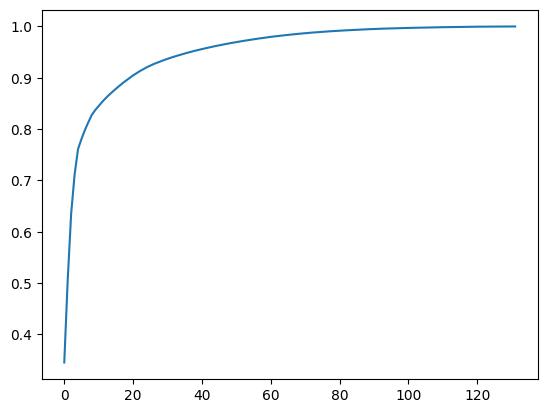

: 

In [ ]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from fcmeans import FCM

class FuzzyCMeansClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=3, max_iter=150, m=2.0, error=1e-5):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error

    def fit(self, X, y=None):
        # Fit the FCM model
        self.fcm = FCM(n_clusters=self.n_clusters, max_iter=self.max_iter, m=self.m)
        self.fcm.fit(X)
        
        # The cluster centers and membership matrix
        self.cntr = self.fcm.centers
        self.u = self.fcm.u
        
        # Assign labels based on highest membership
        self.labels_ = np.argmax(self.u, axis=0)
        return self

    def predict(self, X):
        # Predict the membership matrix for the new data
        u = self.fcm.predict(X)
        
        # Assign labels based on highest membership
        return np.argmax(u, axis=1)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV

clf = Pipeline([
    ("kpca", KernelPCA()),
    ("fcm", FuzzyCMeansClassifier())
])


In [2]:
param_grid = [{
    "kpca__n_components": np.arange(4, 26),  # More components to account for high feature dimensionality
    "kpca__gamma": np.linspace(0.001, 0.1, 10),  # Wider range for gamma
    "kpca__kernel": ["rbf", "sigmoid", "poly"],  # Including more kernel types
    "fcm__n_clusters": [4, 5, 6, 7],  # Exploring a larger range of clusters
    "fcm__m": [1.0, 1.5, 2.0, 2.5, 3, 5],  # Testing a wider range for fuzziness
    "fcm__max_iter": [200, 300, 500]  # More iterations for convergence
}]


NameError: name 'np' is not defined

In [1]:
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)


NameError: name 'GridSearchCV' is not defined